# Classification Project

This classification project aims to predict whether a banking client will make a term deposit with the bank. The dataset used in this project contains information about the clients, including their age, job, marital status, education, default status, balance, housing ownership, loan status, contact day and month, call duration, previous campaign participation, and whether they made a term deposit in the past.

The objective of this project is to build a model that maximizes the ratio True positive/(True Positive + False Positive). In other words, the goal is to maximize the return on investment of effort.

**References:**

S. Moro, P. Cortez, and P. Rita. "A Data-Driven Approach to Predict the Success of Bank Telemarketing." Decision Support Systems, Elsevier, 62:22-31, June 2014.

Dataset Source: [Banking Dataset: Marketing Targets](https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets)

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
sns.set_style("whitegrid")


In [52]:
# Data Cleaning

# Step 1: Reading the test and train datasets
df_test = pd.read_csv("C:\\Users\\thoma\\Dropbox\\Python_Projects\\Data\\test.csv", delimiter=';')
df_train = pd.read_csv("C:\\Users\\thoma\\Dropbox\\Python_Projects\\Data\\train.csv", delimiter=';')

# Step 2: Dropping columns 'day' and 'month' from train and test DataFrames
df_train = df_train.drop(['day', 'month'], axis=1)
df_test = df_test.drop(['day', 'month'], axis=1)

# Step 3: Replacing categorical values with numerical values
# Replacing 'yes' with 1 and 'no' with 0 in columns 'default', 'housing', 'loan', and 'y'
for col in ['default', 'housing', 'loan', 'y']:
    df_train[col].replace(['yes', 'no'], [1, 0], inplace=True)
    df_test[col].replace(['yes', 'no'], [1, 0], inplace=True)

# Step 4: Separating categorical and numerical columns into separate DataFrames
# Creating df_cat DataFrame with categorical columns and the target column 'y'
cat_cols = ['job', 'marital', 'education', 'poutcome']
tar_cols = ['y']
df_cat = df_train[cat_cols + tar_cols]

# Creating df_num DataFrame with numerical columns and the target column 'y'
num_cols = ['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous']
df_num = df_train[num_cols + tar_cols]


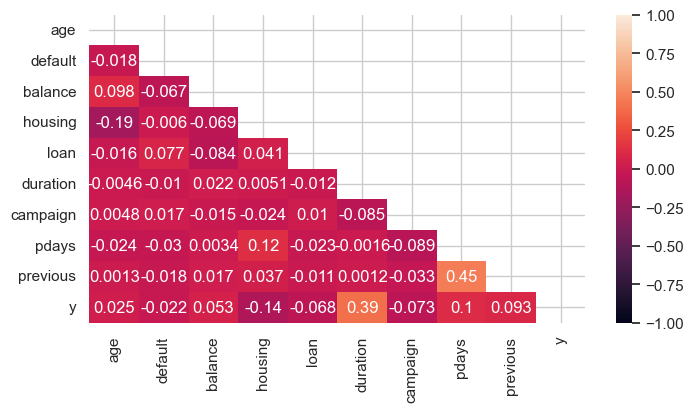

In [53]:
# Correlation Test
# Checking to see if any of the variables are strongly correlated with one another.

plt.figure(figsize=(8,4))  # Step 1: Sets the size of the figure (width: 8 inches, height: 4 inches)
mask = np.triu(np.ones_like(df_num.corr(), dtype=bool))  # Step 2: Creates a mask to hide the upper triangular part of the heatmap
sns.heatmap(df_num.corr(), vmin=-1, vmax=1, mask=mask, annot=True)  # Step 3: Creates a heatmap using the correlation matrix and applies the mask
plt.show()  # Step 4: Displays the heatmap


### Heat Map/Correlation Matrix Summary

- The 'duration' variable has the highest positive correlation with the target variable 'y' (term deposit subscription), with a correlation coefficient of 0.394521. This indicates that a longer duration of the call is associated with a higher likelihood of a term deposit subscription.

- Other variables that show a moderate positive correlation with 'y' include 'pdays' (0.103621) and 'previous' (0.093236). This suggests that a higher number of days since the last contact and a higher number of previous contacts are associated with a slightly higher likelihood of a term deposit subscription.

- The 'housing' variable has a negative correlation (-0.139173) with 'y', indicating that clients who own a house are less likely to subscribe to a term deposit.

- Other variables that show a weak correlation with 'y' include 'balance' (0.052838), 'age' (0.025155), and 'loan' (-0.068185).

- Variables such as 'campaign', 'default', and 'pdays' show weak correlations with 'y', suggesting that they may have less influence on the likelihood of a term deposit subscription.

These findings provide insights into the potential relationships between the variables and the target variable 'y' (term deposit subscription). It can guide further analysis and feature selection for building a predictive model to maximize the return on investment of effort in the banking campaign.

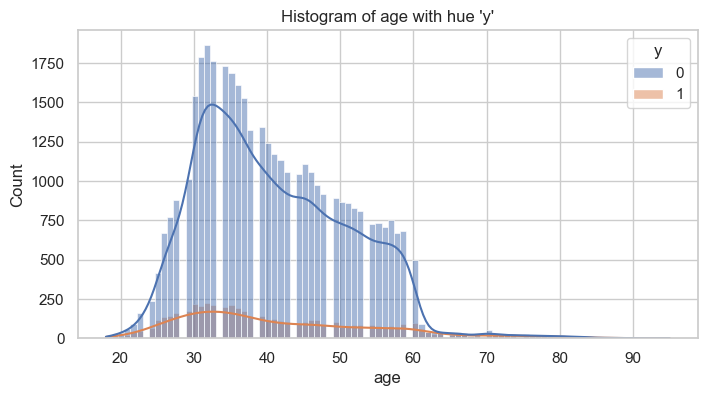

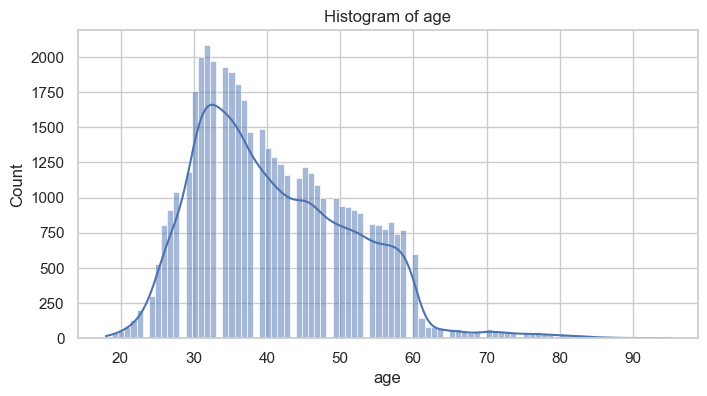

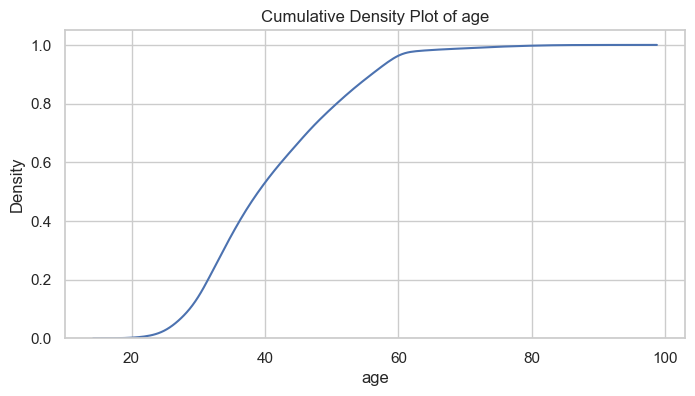

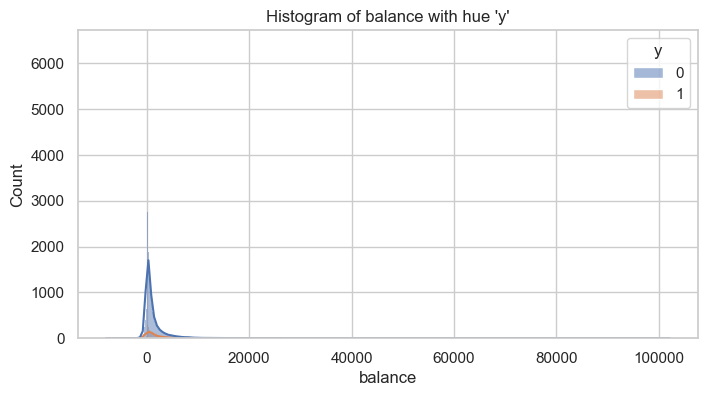

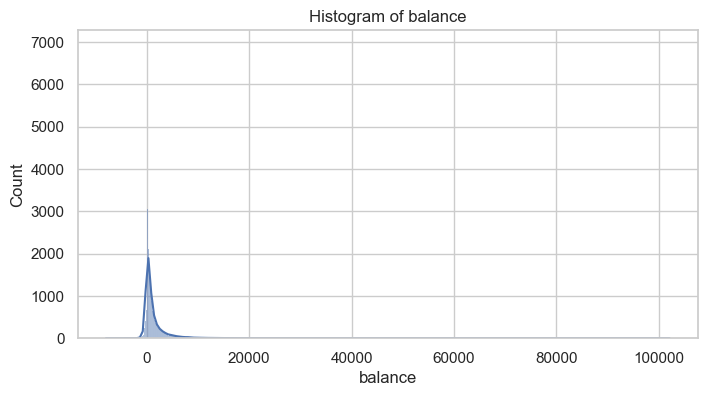

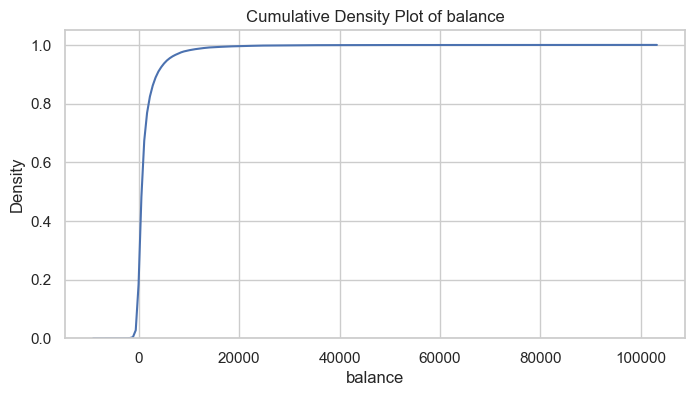

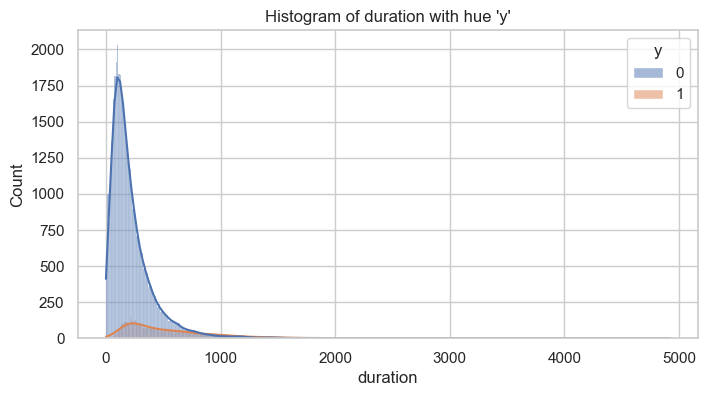

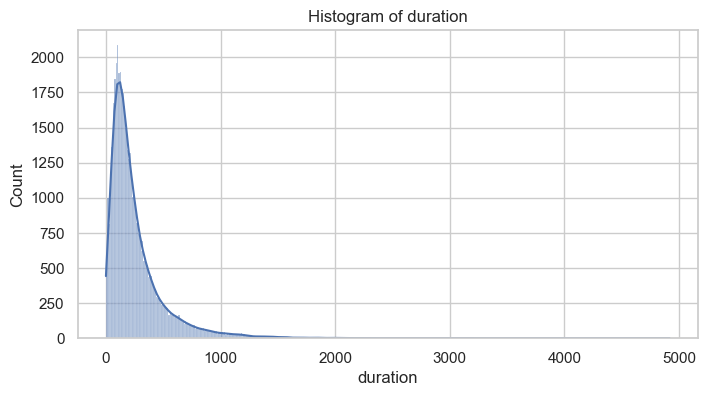

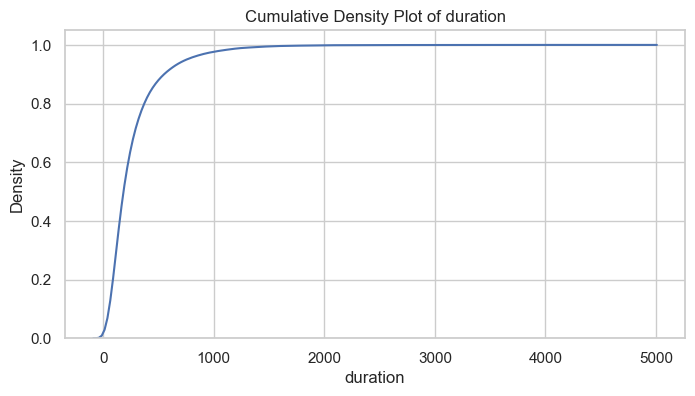

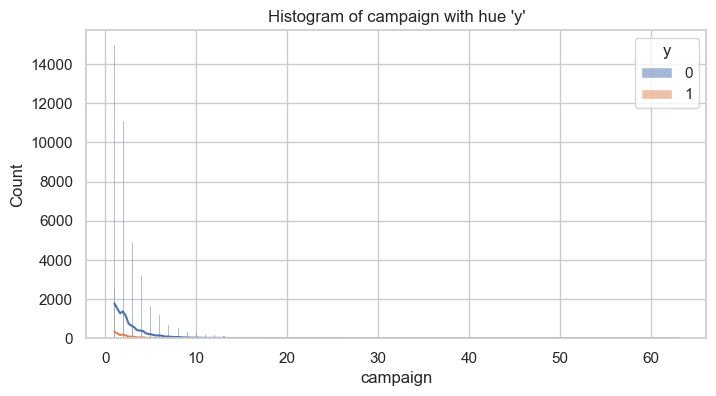

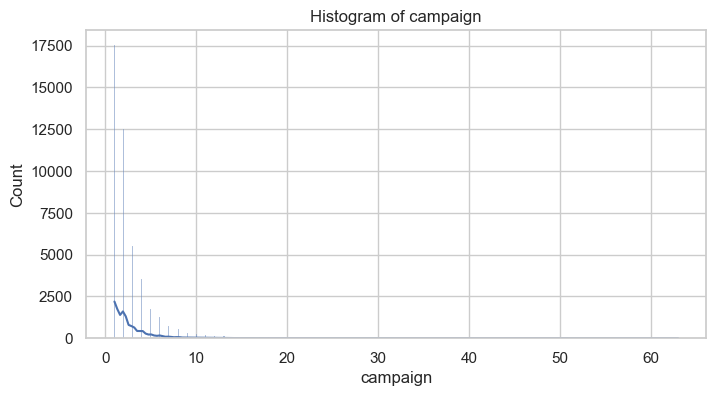

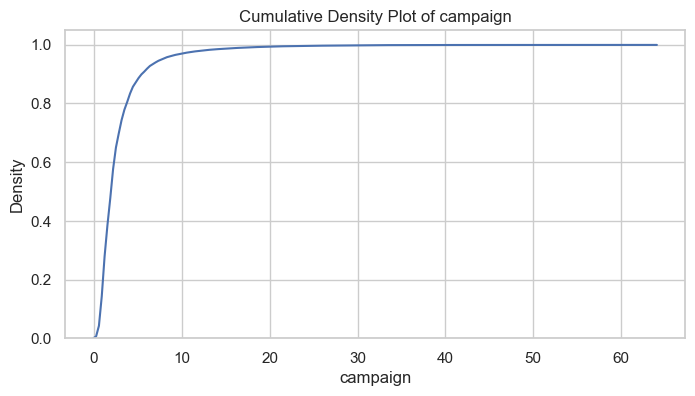

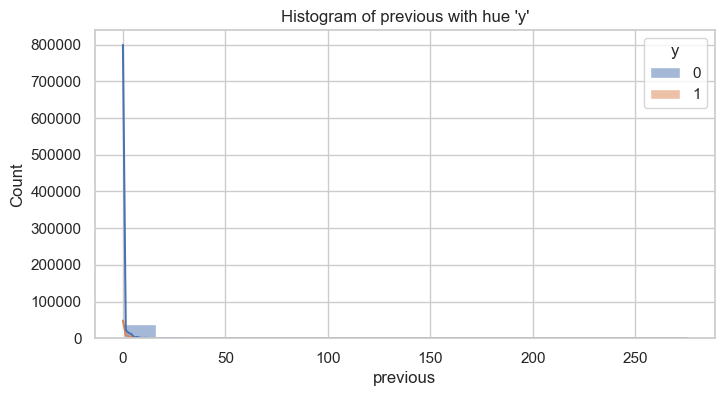

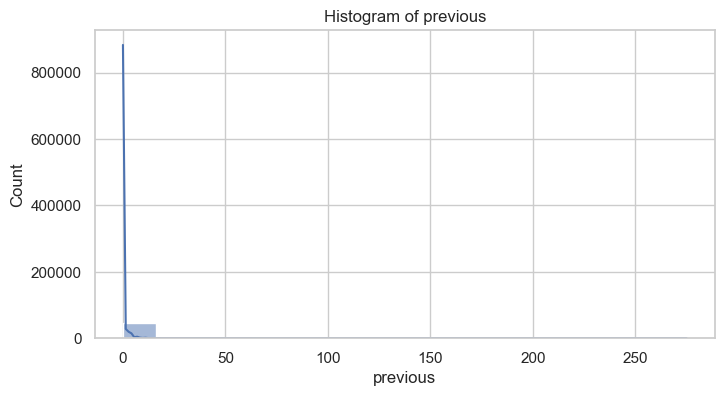

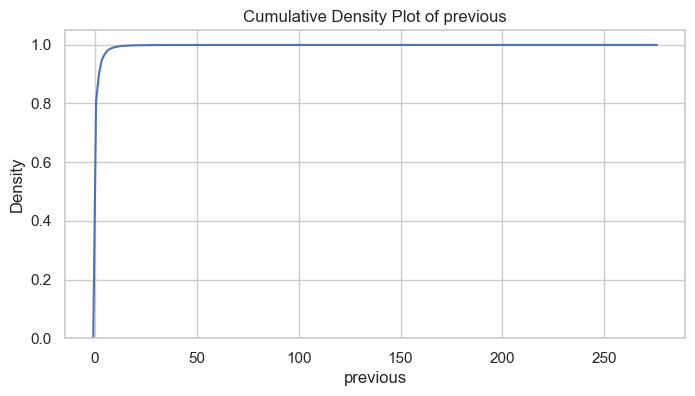

In [54]:
# More Data Exploration

# Define a function to plot histograms and cumulative density plots
def plot_histogram(data, name, bins=30, kde=True, figsize=(8,4)):
    # Plot histogram with hue 'y'
    plt.figure(figsize=figsize)
    sns.set_theme(style="whitegrid")
    sns.histplot(x=data[name], data=data, hue='y', kde=kde)
    plt.title(f"Histogram of {name} with hue 'y'")
    plt.show()

    # Plot histogram without hue 'y'
    plt.figure(figsize=figsize)
    sns.set_theme(style="whitegrid")
    sns.histplot(x=data[name], data=data, kde=kde)
    plt.title(f"Histogram of {name}")
    plt.show()

    # Plot cumulative density plot (kde)
    plt.figure(figsize=figsize)
    sns.set_theme(style="whitegrid")
    sns.kdeplot(x=data[name], data=data, cumulative=True)
    plt.title(f"Cumulative Density Plot of {name}")
    plt.show()

# Iterate over selected columns and call plot_histogram function
for col in ['age', 'balance', 'duration', 'campaign', 'previous']:
    plot_histogram(df_train, col)


In [55]:
# Feature Importance using F-score and p-value

# Separating features (x) and the target variable (y)
x = df_num[df_num.columns[:-1]]
y = df_num[df_num.columns[-1]]

# Compute F-scores and p-values using f_classif
f_score, p_value = f_classif(x, y)

# Iterate over features and print their p-values
for i in range(len(df_num.columns[:-1])):
    print(df_num.columns[:-1][i], ': ', p_value[i])


age :  8.825643692172049e-08
default :  1.866326526158345e-06
balance :  2.5211136918594683e-29
housing :  2.621926571845309e-194
loan :  9.793657535311501e-48
duration :  0.0
campaign :  1.0123473642045049e-54
pdays :  3.79055331945749e-108
previous :  7.801830349772383e-88


### Summary of data exploration:

- 'age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', and 'previous' all exhibit strong associations with the likelihood of term deposit subscription (target variable 'y').
- 'housing', 'duration', 'campaign', 'pdays', and 'previous' show particularly strong associations with 'y'.
- Factors such as age, default status, balance, housing status, loan presence, call duration, contact frequency, days since last contact, and previous interactions are all important in predicting term deposit subscription.
- These findings emphasize the significance of various client characteristics and campaign-related factors in the decision-making process for term deposit subscription.

In [56]:
# Feature Importance using Chi-square Test

# Create a LabelEncoder object
le = LabelEncoder()

# Separate features (x) and the target variable (y)
x = df_cat[df_cat.columns[:-1]].copy()
y = df_cat[df_cat.columns[-1]]

# Encode categorical features using LabelEncoder
for col in df_cat.columns[:-1]:
    x[col] = le.fit_transform(x[col])

# Calculate chi-square scores and p-values
chi_score, pvalue = chi2(x, y)

# Iterate over features and print their p-values
for i in range(len(df_cat.columns[:-1])):
    print(df_cat.columns[:-1][i], ': ', pvalue[i])


job :  1.4125763345435744e-41
marital :  4.8744975856275684e-08
education :  1.7429221644637613e-21
poutcome :  1.4372537073338641e-24


### Summary of the chi-square test:

'job', 'marital', 'education', and 'poutcome' all show strong associations with the likelihood of term deposit subscription.
Occupation, marital status, education level, and the outcome of previous campaigns are important factors in predicting term deposit subscription.
These categorical features exhibit highly significant associations with the target variable, suggesting their relevance in the decision-making process.
The p-values indicate the level of association, with extremely low p-values indicating strong associations.
This summary provides a concise overview of the significant associations between the categorical features and the target variable, emphasizing their importance in predicting term deposit subscription.

In [57]:
# Encoding categorical variables
le = LabelEncoder()
df_train['job'] = le.fit_transform(df_train['job'])
df_test['job'] = le.fit_transform(df_test['job'])

# One-hot encoding categorical variables
df_train = pd.get_dummies(df_train, columns=['marital', 'poutcome', 'contact'])
df_test = pd.get_dummies(df_test, columns=['marital', 'poutcome', 'contact'])

# Encoding ordinal variable 'education'
df_train['education'].replace(['primary', 'secondary', 'tertiary', 'unknown'], [1, 2, 3, 0], inplace=True)
df_test['education'].replace(['primary', 'secondary', 'tertiary', 'unknown'], [1, 2, 3, 0], inplace=True)

# Standardizing numerical features
scaler = StandardScaler()
cols = ['age', 'job', 'education', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous']
X_train = pd.DataFrame(scaler.fit_transform(df_train[cols]))
X_test = pd.DataFrame(scaler.transform(df_test[cols]))

# Assigning target variable and column names
Y_train = df_train['y']
Y_test = df_test['y']
X_train.columns = cols
X_test.columns = cols

# Concatenating features and target variable
train = pd.concat([X_train, Y_train], axis=1)
test = pd.concat([X_test, Y_test], axis=1)

# Concatenating remaining columns
X_train = pd.concat([X_train, df_train.iloc[:, len(cols)+1:]], axis=1)
X_test = pd.concat([X_test, df_test.iloc[:, len(cols)+1:]], axis=1)

# Initializing models
models = []
models.append(LogisticRegression(solver='liblinear'))
models.append(SVC())
models.append(KNeighborsClassifier())
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())
models.append(GaussianNB())
model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']

# Lists for storing evaluation metrics
acc_list = []
auc_list = []
cm_list = []

# Training and evaluating models
for model in models:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(Y_test, Y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(Y_test, Y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr), 2))
    cm_list.append(confusion_matrix(Y_test, Y_pred))

# Creating a DataFrame to store results
result_df = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list, 'AUC': auc_list})


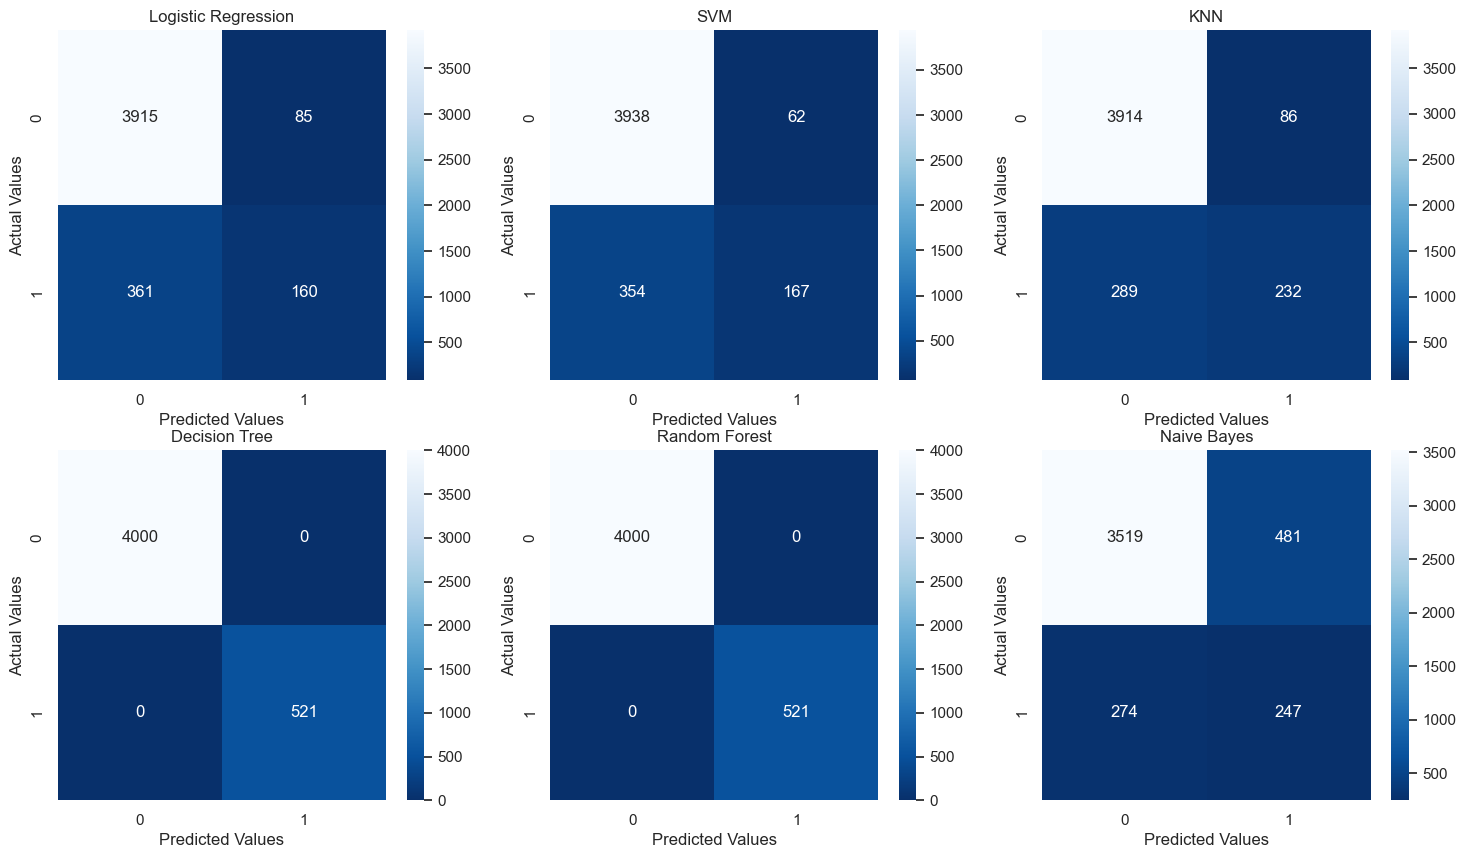

In [58]:
fig = plt.figure(figsize=(18, 10))

# Iterate over the confusion matrices and model names
for i in range(len(cm_list)):
    cm = cm_list[i]  # Get the confusion matrix for the current model
    model = model_list[i]  # Get the name of the current model
    
    # Add a subplot to the figure and set the title as the model name
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    
    # Create a heatmap of the confusion matrix with annotations
    cm_plot = sns.heatmap(cm, annot=True, fmt="d", cmap='Blues_r')
    
    # Set the x-axis label as 'Predicted Values' and y-axis label as 'Actual Values'
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')


In [59]:
result_df

,Model,Accuracy,AUC
0,Logistic Regression,0.901349,0.64
1,SVM,0.907985,0.65
2,KNN,0.917054,0.71
3,Decision Tree,1.000000,1.00
4,Random Forest,1.000000,1.00
5,Naive Bayes,0.833002,0.68


### Conclusions

- The Decision Tree and Random Forest models achieved perfect accuracy and AUC, indicating that they were able to accurately classify all instances in the test dataset. These models demonstrated excellent predictive performance on the given data.

- The K-Nearest Neighbors (KNN) model also performed well, with high accuracy and AUC scores. This model effectively captured the underlying patterns in the data and made accurate predictions.

- The Logistic Regression, Support Vector Machine (SVM), and Naive Bayes models achieved relatively lower accuracy and AUC scores compared to the other models. However, it's worth noting that these models still showed reasonable performance.

- The findings suggest that the decision tree-based models (Decision Tree and Random Forest) were particularly effective in capturing the complex relationships between the features and the target variable in the dataset. These models are known for their ability to handle non-linear relationships and interactions between variables.

Overall, the results indicate that the decision tree-based models and the KNN model are well-suited for the task of classifying when a client will make a term deposit with the bank. 